# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isnull().sum() # Столбцы с пропусками

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [6]:
train.fillna("", inplace=True)

In [7]:
test.isnull().sum()

id            0
keyword      17
location    773
text          0
target        0
dtype: int64

In [8]:
test.fillna("", inplace=True)

In [9]:
train.isnull().any().any(), test.isnull().any().any() # Теперь пропусков нет

(False, False)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [10]:
train.target.value_counts() # Распределение классов более-менее сбалансированное

0    3024
1    2305
Name: target, dtype: int64

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [11]:
from collections import Counter
Counter(train.keyword).most_common(10) # Самым популярным ключевым словом (с индексом 0) является пустая строка, заменившая пропуски в прошлом номере. Будем рассматривать значения, несущие смысл.

[('', 44),
 ('damage', 36),
 ('siren', 35),
 ('wreckage', 34),
 ('fatalities', 33),
 ('deluge', 31),
 ('nuclear%20reactor', 30),
 ('emergency', 30),
 ('derail', 30),
 ('harm', 30)]

In [12]:
popular_keywords = [a for a, b in Counter(train.keyword).most_common(11)[1:]]
popular_keywords

['damage',
 'siren',
 'wreckage',
 'fatalities',
 'deluge',
 'nuclear%20reactor',
 'emergency',
 'derail',
 'harm',
 'twister']

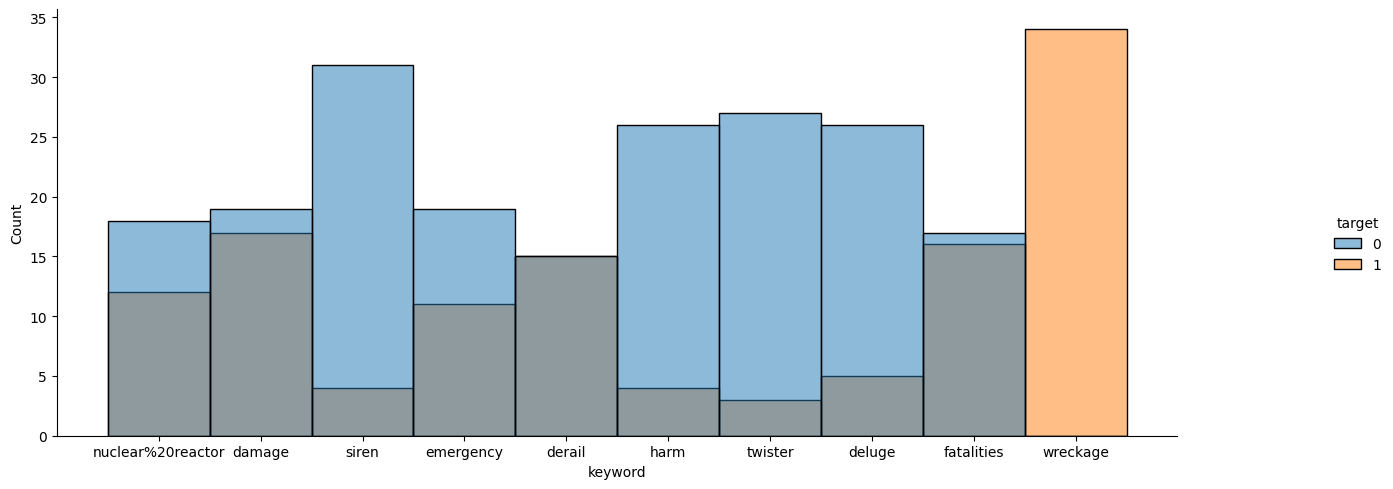

In [13]:
sns.displot(train[train.keyword.isin(popular_keywords)], x='keyword', hue='target')
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

**Выводы**: Заметим, что при ключевом слове твита 'wreckage', правильный ответ всегда - положительный класс (в твите есть информация о настоящей катастрофе/инциденте); при ключевых словах 'siren', 'harm', 'twister', 'deluge' правильный ответ в подавляющем большинстве случаев - отрицательный класс (в твитте не содержится информации о катастрофе/инциденте). Исходя из оставшихся ключевых слов, трудно понять, содержит ли твит информацию о катастрофе/инциденте.

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [14]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [15]:
train_new = train[['text', 'target']]
train_new.text = train.keyword + ' ' + train.location + ' ' + train.text

<ipython-input-15-b47b24f57e6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new.text = train.keyword + ' ' + train.location + ' ' + train.text


In [16]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


In [17]:
test_new = test[['text', 'target']]
test_new.text = test.keyword + ' ' + test.location + ' ' + test.text

<ipython-input-17-00ee6e24ce88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_new.text = test.keyword + ' ' + test.location + ' ' + test.text


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [18]:
from sklearn.feature_extraction.text import CountVectorizer # чек сем11 и 123
cnt_vec = CountVectorizer()
cnt_vec.fit_transform(train_new.text)

<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>

**2.** Размеры матрицы: 5329x18455

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [19]:
from string import punctuation, digits

In [20]:
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    return not(set(s).isdisjoint(digits)) # isdisjoint - проверка отсутствия общих элементов множества и последовательности

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    return not(set(s).isdisjoint(punctuation))

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return s[0] == '#'

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return s[0] == '@'

def investigate_vocabulary(vocabulary):
    # -- YOUR CODE HERE --
    print('With digit:      ', sum(map(contains_digit, vocabulary.keys()))
          )
    print('With punctuation:', sum(map(contains_punctuation, vocabulary.keys()))
          )
    print('Hashtags:        ', sum(map(is_hashtag, vocabulary.keys()))
          )
    print('Mentions:        ', sum(map(is_mention, vocabulary.keys()))
          )

In [21]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [22]:
investigate_vocabulary(cnt_vec.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [23]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [24]:
tw_cnt_vec = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
tw_cnt_vec.fit_transform(train_new.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<5329x19670 sparse matrix of type '<class 'numpy.int64'>'
	with 94563 stored elements in Compressed Sparse Row format>

In [25]:
investigate_vocabulary(tw_cnt_vec.vocabulary_)

With digit:       3939
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


**Сравнение:** В силу того, что TweetTokenizer используется в работе с твитами, хранит смайлы, хештеги и.т.д., логично предположить что при применении CountVectorizer с данным токенизатором (вместо None) количество слов с хештегами, упоминаниями, символами пунктуации и др. увеличится, т.к. некоторые символы/комбинации символов теперь не будут "выбрасываться". Так и произошло: появилось более тысячи хештегов, упоминаний, более 7 тысяч слов с пунктуациями и также слова с цифрами.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [26]:
import re
import nltk
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [27]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    return bool(re.match(r"[A-Za-z]+$", s))

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    return (set(s).intersection(set(punctuation)) == set(s)) and (not(set(s).isdisjoint('()')))  # скобка есть в punctuation

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return bool(re.match(r"#[A-Za-z]+$", s))

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    s = s.lower()
    s = TweetTokenizer().tokenize(s)
    s = np.array(s)[list(map(lambda x: contains_only_latin_letters(x) or is_emoji(x) or is_hashtag(x), s))]

    s = np.array(s)[np.invert(np.in1d(s, stopwords.words("english")))]
    # Сначала np.in1d отберёт индексы стопслов в наших токенах. Далее инвертируются индексы, чтобы получить индексы не стопслов.
    # И в конце концов по этим индексам отбираются элементы массива.

    stemmer = SnowballStemmer("english")
    return list(map(stemmer.stem, s))

In [28]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [29]:
for t in train_new.text[:10]:
  print(custom_tokenizer(t))

['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['burn', 'except', 'idk', 'realli', 'burn']
['destroy', '(', 'ask', ')', 'destroy', 'hous']
['wound', 'maracay', 'nirgua', 'venezuela', 'polic', 'offic', 'wound', 'suspect

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [30]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
X_train = vectorizer.fit_transform(train_new.text)
X_test = vectorizer.transform(test_new.text)

2. Обучите LogisticRegression на полученных признаках.


In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, train_new.target)

3. Посчитайте метрику f1-score на тестовых данных.

In [32]:
from sklearn.metrics import f1_score
cnt_f1 = f1_score(test_new.target, lr.predict(X_test))
print('F1 score:', cnt_f1)

F1 score: 0.7533584094572812


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1
tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer)
tfidf_X_train = tfidf_vec.fit_transform(train_new.text)
tfidf_X_test = tfidf_vec.transform(test_new.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [34]:
tfidf_lr = LogisticRegression().fit(tfidf_X_train, train_new.target)
tfidf_f1 = f1_score(test_new.target, tfidf_lr.predict(tfidf_X_test))
print('F1 score:', tfidf_f1)

F1 score: 0.7422222222222221


In [35]:
print('F1 difference:', cnt_f1 - tfidf_f1)

F1 difference: 0.011136187235059047


1. **Ответ:** При использовании *TfidfVectorizer* качество ухудшилось примерно на 0.01

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [36]:
# 2
tfidf2_vec = TfidfVectorizer(tokenizer=custom_tokenizer, max_df = 0.9)
tfidf2_X_train = tfidf2_vec.fit_transform(train_new.text)
tfidf2_X_test = tfidf2_vec.transform(test_new.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [37]:
tfidf2_lr = LogisticRegression().fit(tfidf2_X_train, train_new.target)
tfidf2_f1 = f1_score(test_new.target, tfidf2_lr.predict(tfidf2_X_test))
print('F1 score:', tfidf2_f1)

F1 score: 0.7422222222222221


In [38]:
tfidf_X_train.shape, tfidf2_X_train.shape, tfidf_X_test.shape, tfidf2_X_test.shape

((5329, 10481), (5329, 10481), (2284, 10481), (2284, 10481))

2. **Ответ:** размеры матрицы не изменились (и для обучающей, и для тестовой выборки), значит не нашлось токенов с df > 0.9. Размеры матрицы не поменялись, значит, словарь не изменился, тогда логично, что f1-score не должна меняться. Так и получилось: значение метрики f1-score не изменилось при установлении max_df = 0.9.

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [39]:
# 3
tfidf3_vec = TfidfVectorizer(tokenizer=custom_tokenizer, min_df = 0.001, max_df = 0.9)
tfidf3_X_train = tfidf3_vec.fit_transform(train_new.text)
tfidf3_X_test = tfidf3_vec.transform(test_new.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
tfidf3_lr = LogisticRegression().fit(tfidf3_X_train, train_new.target)
tfidf3_f1 = f1_score(test_new.target, tfidf3_lr.predict(tfidf3_X_test))
print('F1 score:', tfidf3_f1)

F1 score: 0.7445175438596492


In [41]:
tfidf2_X_train.shape, tfidf3_X_train.shape, tfidf2_X_test.shape, tfidf3_X_test.shape

((5329, 10481), (5329, 1740), (2284, 10481), (2284, 1740))

3. **Ответ:** При min_df = 0.001 удалось добиться незначительного улучшения качества на 0.002. Возможно, это связано с тем, что слова с df < 0.001 слишком редко встречаются в текстах, и по ним трудно определить значение целевой переменной.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [42]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_vec = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
hash_X_train = hash_vec.fit_transform(train_new.text)
hash_X_test = hash_vec.transform(test_new.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [43]:
hash_lr = LogisticRegression().fit(hash_X_train, train_new.target)
hash_f1 = f1_score(test_new.target, hash_lr.predict(hash_X_test))
print('F1 score:', hash_f1)

F1 score: 0.7194645844952593


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** Значение метрики f1-score наибольшее при использовании CountVectorizer с custom_tokenizer (задание 8).

In [44]:
print('F1 score for CounterVectorizer with custom_tokenizer:', cnt_f1)

F1 score for CounterVectorizer with custom_tokenizer: 0.7533584094572812


## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [45]:
print('F1 score for CounterVectorizer with custom_tokenizer:', cnt_f1)

F1 score for CounterVectorizer with custom_tokenizer: 0.7533584094572812


**Пояснение:** в 8 задании уже было получено значение метрики f1-score >= 0.75.